In [70]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

import prepare


Loan Prediction

https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

Project idea: The idea behind this ML project is to build a model that will classify how much loan the user can take. It is based on the user’s marital status, education, number of dependents, and employments. We can build a linear model for this project.

# Acquire

In [2]:
df1 = pd.read_csv('loan.csv')

In [3]:
df2 = pd.read_csv('loan2.csv')

In [4]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df2.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
df2.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df1.shape

(614, 13)

In [9]:
df2.shape

(367, 12)

In [10]:
# merge the two dataframes
#df = df1.merge(df2, how='outer', on='Loan_ID')

In [11]:
df =pd.concat([df1,df2])

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


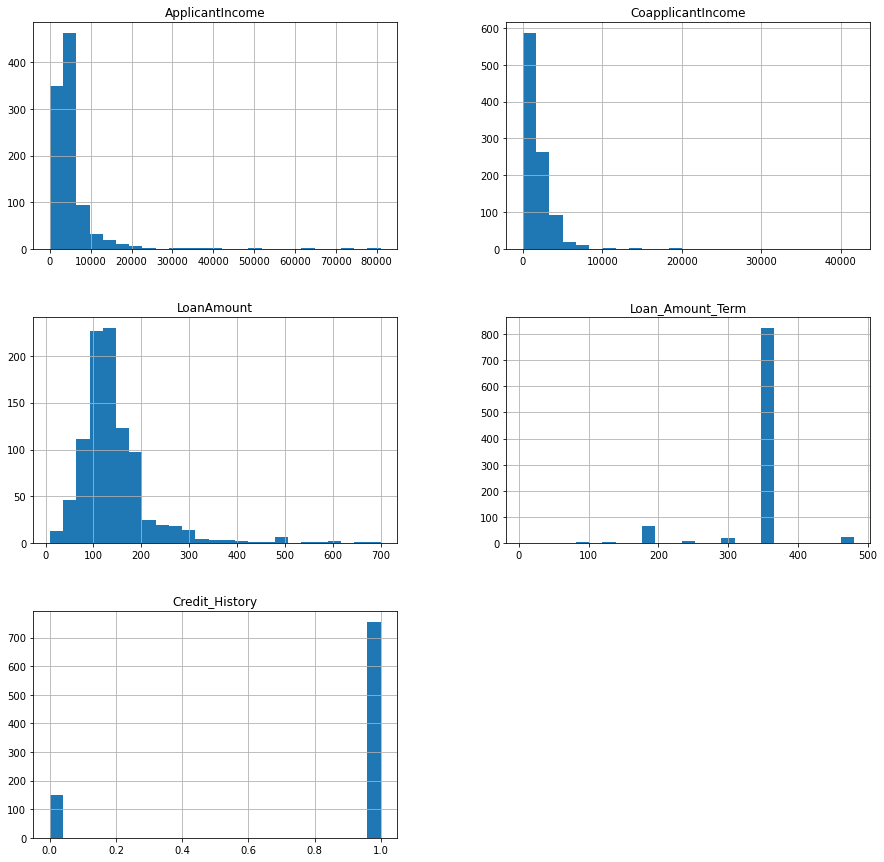

In [13]:
%matplotlib inline 


df.hist(bins=25, figsize=(15,15))
plt.show()

QUESTION: HOW DO I MAKE THE ABOVE HISTOGRAMS BIGGER

Takeaways
- I pulled in 2 csv's with 980 rows with each row representing an applicant
- The loan amount is equally distributed
- The applicantincome is right skewed

# Prepare

In [14]:
# rename column
df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [16]:
df.shape

(981, 13)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             981 non-null    object 
 1   Gender              957 non-null    object 
 2   Married             978 non-null    object 
 3   Dependents          956 non-null    object 
 4   Education           981 non-null    object 
 5   Self_Employed       926 non-null    object 
 6   Applicant_Income    981 non-null    int64  
 7   Coapplicant_Income  981 non-null    float64
 8   Loan_Amount         954 non-null    float64
 9   Loan_Amount_Term    961 non-null    float64
 10  Credit_History      902 non-null    float64
 11  Property_Area       981 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [18]:
# check for nulls
df.isna().sum()

Loan_ID                 0
Gender                 24
Married                 3
Dependents             25
Education               0
Self_Employed          55
Applicant_Income        0
Coapplicant_Income      0
Loan_Amount            27
Loan_Amount_Term       20
Credit_History         79
Property_Area           0
Loan_Status           367
dtype: int64

In [19]:
# drop nulls in all but loan status
df = df.dropna(subset=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

QUESTION: WHAT SHOULD I DO WITH THE NULLS IN THE TARGET COLUMN? DO I DROP ALL OF THOSE
ROWS? WHAT IF THAT ONLY LEAVES ME 480 ROWS TOTAL SHOULD I CONTINUE WITH THIS DATASET?

In [20]:
df.shape

(769, 13)

In [21]:
df = df.dropna()

In [22]:
df.shape

(480, 13)

In [23]:
# remove duplicates
df.drop_duplicates(keep=False,inplace=True)

In [24]:
df.shape
# so there are no duplicates

(480, 13)

In [59]:
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
Applicant_Income        int64
Coapplicant_Income    float64
Loan_Amount           float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
dtype: object

In [25]:
# now it's time to split the df
train, validate, test = prepare.train_validate_test_split(df, target='Loan_Status')

In [26]:
train.shape

(268, 13)

In [27]:
validate.shape

(116, 13)

In [28]:
test.shape

(96, 13)

In [29]:
def prep_function():
    # rename column
    df = df.rename(columns={'ApplicantIncome': "Applicant_Income",'CoapplicantIncome': "Coapplicant_Income", 'LoanAmount':"Loan_Amount"})
    # drop nulls in all but loan status
    df = df.dropna(subset=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area'])

# Explore

5 questions to explore:
  
    1. Is there a relationship between applicant income and loan approval
    2. Is there a relationship between being male and loan approval
    3. Is there a relationshipp between applicant income and loan amount -yes
    4. Is there a relationship between property area and loan approval -
    5. Does loan amount have a relationship wiht loan approval

In [30]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

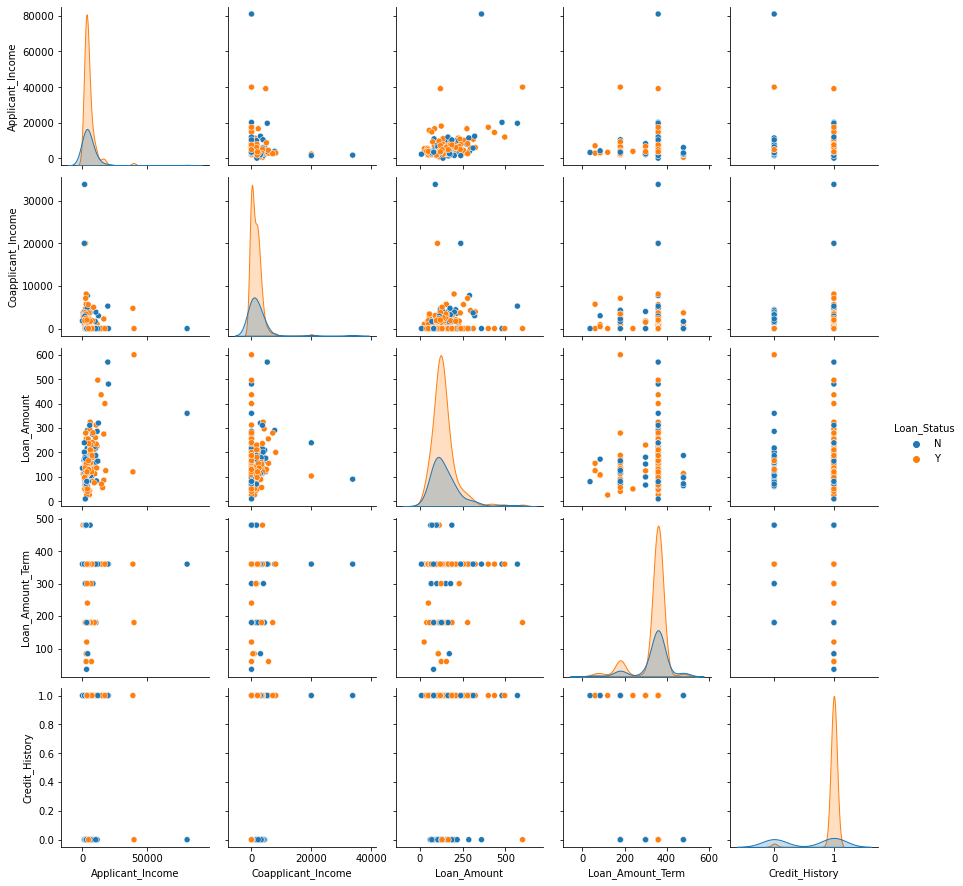

In [31]:
# Next I'll display some pairplots
sns.pairplot(train, hue='Loan_Status')
plt.show()

In [60]:
def get_status_heatmap(df):
    '''returns a beautiful heatmap with correlations'''
    plt.figure(figsize=(8,12))
    loan_heatmap = sns.heatmap(df.corr()[['Loan_Status']].sort_values(by='Loan_Status', ascending=False), vmin=-.5, vmax=.5, annot=True,cmap='flare')
    loan_heatmap.set_title('Features Correlated with Loan Status')

In [62]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [61]:
get_status_heatmap(df)

KeyError: "None of [Index(['Loan_Status'], dtype='object')] are in the [columns]"

<Figure size 576x864 with 0 Axes>

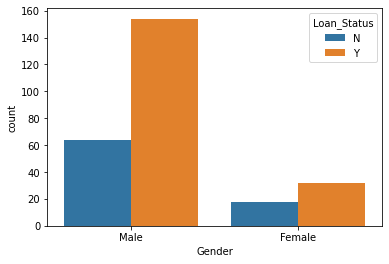

In [32]:
# plot senior_citizen by churn in a countplot
sns.countplot(data=train, x='Gender', hue='Loan_Status')
plt.show()

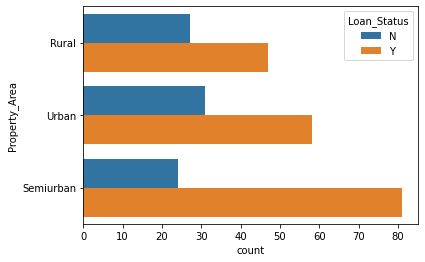

In [34]:
# plot senior_citizen by churn in a countplot
sns.countplot(data=train, y='Property_Area', hue='Loan_Status')
plt.show()

let's take this one step further to cement the relationship between loan status and property_area and run a chi2 test
H0: There is no association between property area and loan status
HA: There is an association between property area and loan status

In [35]:
a =.05

In [36]:
contingency_table = pd.crosstab(train.Property_Area, train.Loan_Status)
contingency_table

Loan_Status,N,Y
Property_Area,,
Rural,27,47
Semiurban,24,81
Urban,31,58


In [37]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(4.922318389025131,
 0.08533597261964072,
 2,
 array([[22.64179104, 51.35820896],
        [32.12686567, 72.87313433],
        [27.23134328, 61.76865672]]))

In [38]:
_, p, _, expected = test_results
p

0.08533597261964072

With such a high p-value, we fail to reject the null hypothesis and accept there is an association between property area and loan status

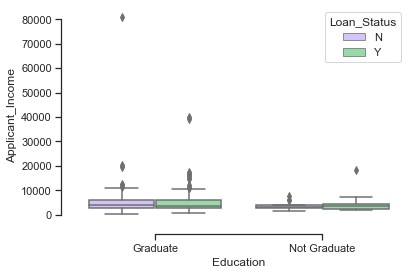

In [39]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Education", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

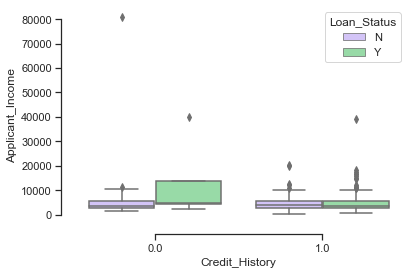

In [40]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Credit_History", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

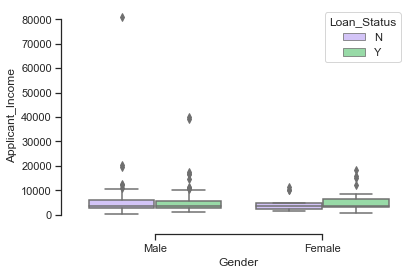

In [41]:
sns.set_theme(style="ticks", palette="pastel")


# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="Gender", y="Applicant_Income",
            hue="Loan_Status", palette=["m", "g"],
            data=train)
sns.despine(offset=10, trim=True)

-here I want to test if loan status is independent of gender using a Chi2 test
H0: Gender is independent of Loan status 
HA: Gender has a relationship with loan status

In [42]:
a = .05

In [43]:
contingency_table = pd.crosstab(train.Gender, train.Loan_Status)
contingency_table

Loan_Status,N,Y
Gender,,
Female,18,32
Male,64,154


In [44]:
test_results = stats.chi2_contingency(contingency_table)
test_results

(0.561158470418679,
 0.4537938534984186,
 1,
 array([[ 15.29850746,  34.70149254],
        [ 66.70149254, 151.29850746]]))

In [45]:
_, p, _, expected = test_results
p > a

True

Since p > a is True we reject H0 that gender is independent of loan status

-here I want compare two continuous variables and see if they are linearly correlated
using a Pearson r test
H0: Loan amount and applicant income has no linear correlation 
HA: Loan amount and applicant income havev linear correlation 

In [46]:
a = .05

In [47]:
test_results = stats.pearsonr(train.Loan_Amount, train.Applicant_Income)
test_results

(0.4979008674539382, 3.3994686691534077e-18)

In [48]:
r, p = test_results

print(f'p is {p:.10f}')

p is 0.0000000000


In [49]:
# so we can reject the H0 and accept that these to variables are linearly correlated

<AxesSubplot:xlabel='Loan_Amount', ylabel='Applicant_Income'>

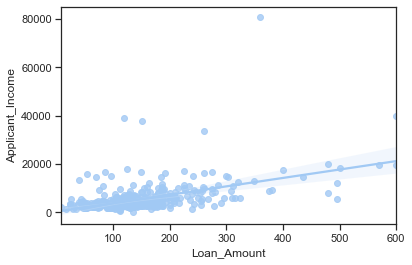

In [50]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["Loan_Amount"], y=df["Applicant_Income"])

<AxesSubplot:xlabel='Loan_Amount', ylabel='Coapplicant_Income'>

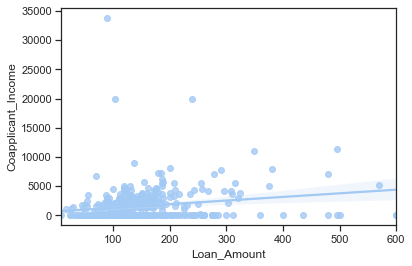

In [51]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["Loan_Amount"], y=df["Coapplicant_Income"])

Takeaways
- From the pairplot I can see credit history has a relationship with loan status
- From the countplot I can being male has a relationship with loan status, I tested this with a Chi2 test and confirmed there is a relationship
- From another countplot I can see semi urban property area has a relationship with loan status, I tested this with a chi2 test and confirmed they do have a relationship
- From the boxplot I can see education probably has a weak relationship with loan status
- Another box plot surprised me showng that no credit has a relationship with loan status that was the opposite of what I expected to see
- From my scatter plot I can see loan amount and applicant income has a linear relationship, I tested this with a Pearson r test and found this to be true
- The next scatter plot shows me the coapplicant income is has a weaker linear relationship with the loan amount

# Model & Evaluate

For a classification problem, a common choice for the baseline model is a model that simply predicts the most common class every single time.

In [52]:
# Since yes is the most common status for loans I will set yes for all to  my baseline 
# model
baseline = train.Loan_Status.value_counts().nlargest(1)
baseline

Y    186
Name: Loan_Status, dtype: int64

In [53]:
# Create my baseline model to have something to compare my future models
# to
baseline = train.Loan_Status.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 69.4%.


In [64]:
# Splitting traing data
X = df.iloc[:, 1: 12].values
y = df.iloc[:, 12].values

What do you care about?
Minimizing false positives --> Precision
Minimizing false negatives --> Recall
Both Precision and Recall --> F1 score

In [65]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [67]:
x_cols = ['Gender', 'Married', 'Dependents', 'Education','Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount','Credit_History', 'Property_Area']
y_col = 'Loan_Status'

X_train, y_train = train[x_cols], train[y_col]
X_validate, y_validate = validate[x_cols], validate[y_col]
X_test, y_test = test[x_cols], test[y_col]

In [68]:
X_train.head()

,Gender,Married,Dependents,Education,Applicant_Income,Coapplicant_Income,Loan_Amount,Credit_History,Property_Area
1,Male,Yes,1,Graduate,4583,1508.0,128.0,1.0,Rural
251,Female,No,2,Graduate,3427,0.0,138.0,1.0,Urban
501,Female,No,0,Graduate,3159,0.0,100.0,1.0,Semiurban
519,Female,No,0,Not Graduate,3400,0.0,95.0,1.0,Rural
406,Male,Yes,0,Not Graduate,2167,2400.0,115.0,1.0,Urban


In [ ]:
I am going to start with a Decision Tree algorithm and then try out Random Forest and 

### Model 1

In [71]:
# create the model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [72]:
# fit the model
clf = clf.fit(X_train, y_train)

ValueError: could not convert string to float: 'Male'